Linear regression(OLS)

In [0]:
from google.colab import files

In [2]:
files.upload()

Saving headbrain.csv to headbrain.csv


{'headbrain.csv': b'Gender,Age Range,Head Size(cm^3),Brain Weight(grams)\n1,1,4512,1530\n1,1,3738,1297\n1,1,4261,1335\n1,1,3777,1282\n1,1,4177,1590\n1,1,3585,1300\n1,1,3785,1400\n1,1,3559,1255\n1,1,3613,1355\n1,1,3982,1375\n1,1,3443,1340\n1,1,3993,1380\n1,1,3640,1355\n1,1,4208,1522\n1,1,3832,1208\n1,1,3876,1405\n1,1,3497,1358\n1,1,3466,1292\n1,1,3095,1340\n1,1,4424,1400\n1,1,3878,1357\n1,1,4046,1287\n1,1,3804,1275\n1,1,3710,1270\n1,1,4747,1635\n1,1,4423,1505\n1,1,4036,1490\n1,1,4022,1485\n1,1,3454,1310\n1,1,4175,1420\n1,1,3787,1318\n1,1,3796,1432\n1,1,4103,1364\n1,1,4161,1405\n1,1,4158,1432\n1,1,3814,1207\n1,1,3527,1375\n1,1,3748,1350\n1,1,3334,1236\n1,1,3492,1250\n1,1,3962,1350\n1,1,3505,1320\n1,1,4315,1525\n1,1,3804,1570\n1,1,3863,1340\n1,1,4034,1422\n1,1,4308,1506\n1,1,3165,1215\n1,1,3641,1311\n1,1,3644,1300\n1,1,3891,1224\n1,1,3793,1350\n1,1,4270,1335\n1,1,4063,1390\n1,1,4012,1400\n1,1,3458,1225\n1,1,3890,1310\n1,2,4166,1560\n1,2,3935,1330\n1,2,3669,1222\n1,2,3866,1415\n1,2,3393,11

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()


(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [0]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [10]:
x_mean=X.mean()
y_mean=Y.mean()

IndexError: ignored

In [9]:
m=len(X)

3738

In [30]:
a=0
b=0
c=0
for i in range(0,m):
  a=(X[i]-x_mean)*(Y[i]-y_mean)
  b=a+b
  c=c+(X[i]-x_mean)**2
b1=b/c
b0=y_mean-b1*x_mean
print(b1,b0)
#prediction
y = b0 + b1 * x

0.26342933948939945 325.57342104944223
1016.345534895095


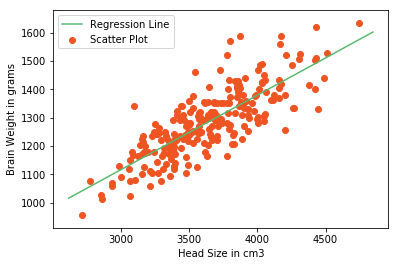

In [21]:

max_x = np.max(X) + 100
min_x = np.min(X) - 100


x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x


plt.plot(x, y, color='#58b970', label='Regression Line')

plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [28]:
#calculating root mean square error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

72.1206213783709


In [35]:
#r2 score
sst=0
ssr=0
for i in range(0,m):
  y_pred = b0 + b1 * X[i]
  sst+=(Y[i]-y_mean)**2
  ssr+=(Y[i]-y_pred)**2
r2=1-ssr/sst
print(r2)

0.6393117199570003


In [37]:
#The Scikit learn approch
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((m, 1))

reg = LinearRegression()

reg = reg.fit(X, Y)

Y_pred = reg.predict(X)

mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957
